In [21]:
#dataset link: https://drive.google.com/drive/folders/1n67sVTTzye4jtLfk8n-sa2fH2gTx5Ywt?usp=share_link

In [22]:
import tensorflow as tf
import numpy as np
import os
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc

DATA_DIR = "../Dataset Korosi/"

In [23]:
## resep yang nemu di: https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner

# model_alexnet = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(3,3)),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),

#     tf.keras.layers.Flatten(),

#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(3,activation='softmax')  
# ])

## resep yang nemu di: https://medium.com/swlh/alexnet-with-tensorflow-46f366559ce8
def create_model(size):

    model_alexnet = tf.keras.models.Sequential()
    model_alexnet.add(tf.keras.layers.experimental.preprocessing.Resizing(size, size, interpolation="bilinear", input_shape=(size,size,3)))
    model_alexnet.add(tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.MaxPooling2D(3, strides=2))
    model_alexnet.add(tf.keras.layers.Conv2D(256, 5, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.MaxPooling2D(3, strides=2))
    model_alexnet.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'))
    model_alexnet.add(tf.keras.layers.Activation('relu'))
    model_alexnet.add(tf.keras.layers.Flatten())
    model_alexnet.add(tf.keras.layers.Dense(4096, activation='relu'))
    model_alexnet.add(tf.keras.layers.Dropout(0.5))
    model_alexnet.add(tf.keras.layers.Dense(4096, activation='relu'))
    model_alexnet.add(tf.keras.layers.Dropout(0.5))
    model_alexnet.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model_alexnet


In [24]:
model_alexnet = create_model(224) ##alexnet terbaik di 224
model_alexnet.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_7 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 lambda_14 (Lambda)          (None, 56, 56, 96)        0         
                                                                 
 activation_35 (Activation)  (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 7, 7, 256)         614656    
                                                     

In [25]:
import matplotlib.pyplot as plt

In [26]:
f = open("alexnet_pengujian_learningrate.csv", "w")
f.write("learningrate,loss,val_loss,acc,val_acc")
f.close()

f = open("alexnet_pengujian_learningrate_model_summary.txt", "w")
f.write("--------==== hasil model summary dari percobaan learning rate ====--------")
f.close()


In [27]:
# buat data pipeline
size = 224
TEST_DATA_DIR = '../testdata'
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
        )

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = training_datagen.flow_from_directory(DATA_DIR,  
                                                        subset='training',
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size))   
val_generator = training_datagen.flow_from_directory(DATA_DIR, 
                                                        subset='validation', 
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size))
test_generator = test_datagen.flow_from_directory(TEST_DATA_DIR, 
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size)) 

Found 532 images belonging to 3 classes.
Found 131 images belonging to 3 classes.
Found 73 images belonging to 3 classes.


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 24s - loss: 906952.9375 - acc: 0.3365 - val_loss: 7.1092 - val_acc: 0.4122 - 24s/epoch - 709ms/step
Epoch 2/50
34/34 - 23s - loss: 5.6364 - acc: 0.3778 - val_loss: 1.0822 - val_acc: 0.3740 - 23s/epoch - 665ms/step
Epoch 3/50
34/34 - 23s - loss: 1.0952 - acc: 0.3835 - val_loss: 1.0636 - val_acc: 0.4122 - 23s/epoch - 671ms/step
Epoch 4/50
34/34 - 23s - loss: 1.0857 - acc: 0.4079 - val_loss: 1.0667 - val_acc: 0.3740 - 23s/epoch - 664ms/step
Epoch 5/50
34/34 - 23s - loss: 1.0789 - acc: 0.3741 - val_loss: 1.0630 - val_acc: 0.4122 - 23s/epoch - 675ms/step
Epoch 6/50
34/34 - 23s - loss: 1.0721 - acc: 0.3966 - val_loss: 1.0734 - val_acc: 0.3740 - 23s/epoch - 680ms/step
Epoch 7/50
34/34 - 24s - loss: 1.0673 - acc: 0.4211 - val_loss: 1.0709 - val_acc: 0.4122 - 24s/epoch - 693ms/step
Epoch 8/50
34/34 - 23s - loss: 1.07

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

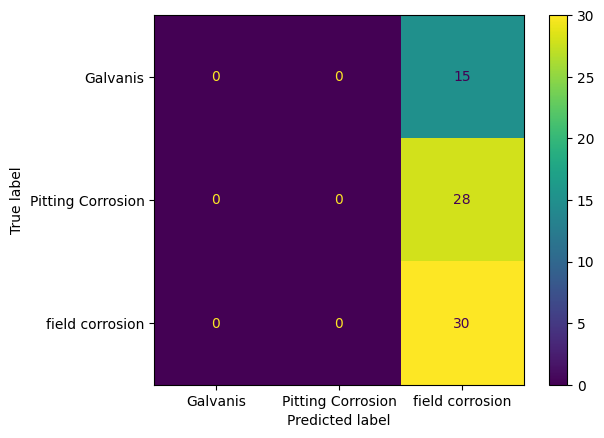

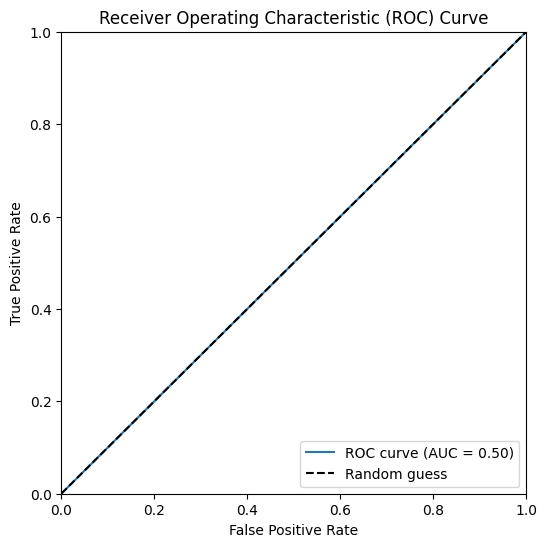

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 28s - loss: 2.5405 - acc: 0.3853 - val_loss: 1.0740 - val_acc: 0.3740 - 28s/epoch - 810ms/step
Epoch 2/50
34/34 - 24s - loss: 1.0869 - acc: 0.3590 - val_loss: 1.0669 - val_acc: 0.3740 - 24s/epoch - 710ms/step
Epoch 3/50
34/34 - 24s - loss: 1.0857 - acc: 0.4023 - val_loss: 1.0693 - val_acc: 0.3740 - 24s/epoch - 696ms/step
Epoch 4/50
34/34 - 24s - loss: 1.0772 - acc: 0.3816 - val_loss: 1.0661 - val_acc: 0.3740 - 24s/epoch - 694ms/step
Epoch 5/50
34/34 - 24s - loss: 1.0784 - acc: 0.3853 - val_loss: 1.0638 - val_acc: 0.4122 - 24s/epoch - 696ms/step
Epoch 6/50
34/34 - 24s - loss: 1.0728 - acc: 0.3778 - val_loss: 1.0653 - val_acc: 0.4122 - 24s/epoch - 702ms/step
Epoch 7/50
34/34 - 24s - loss: 1.0711 - acc: 0.3929 - val_loss: 1.0635 - val_acc: 0.4122 - 24s/epoch - 709ms/step
Epoch 8/50
34/34 - 24s - loss: 1.0700 - 

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

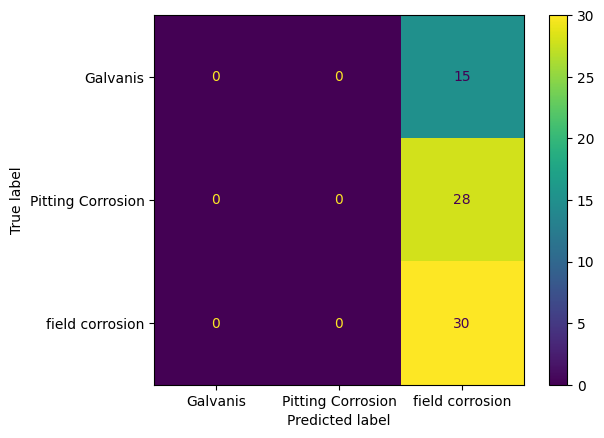

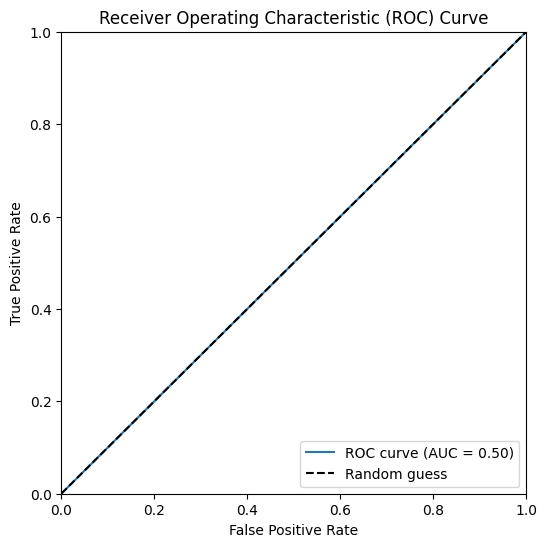

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 25s - loss: 1.0829 - acc: 0.3853 - val_loss: 1.0646 - val_acc: 0.4122 - 25s/epoch - 739ms/step
Epoch 2/50
34/34 - 24s - loss: 1.0771 - acc: 0.3722 - val_loss: 1.0649 - val_acc: 0.4122 - 24s/epoch - 707ms/step
Epoch 3/50
34/34 - 24s - loss: 1.0773 - acc: 0.3966 - val_loss: 1.0705 - val_acc: 0.3740 - 24s/epoch - 708ms/step
Epoch 4/50
34/34 - 24s - loss: 1.0761 - acc: 0.3891 - val_loss: 1.0647 - val_acc: 0.4122 - 24s/epoch - 711ms/step
Epoch 5/50
34/34 - 24s - loss: 1.0726 - acc: 0.3853 - val_loss: 1.0652 - val_acc: 0.3740 - 24s/epoch - 699ms/step
Epoch 6/50
34/34 - 25s - loss: 1.0731 - acc: 0.3872 - val_loss: 1.0641 - val_acc: 0.4122 - 25s/epoch - 721ms/step
Epoch 7/50
34/34 - 25s - loss: 1.0693 - acc: 0.3985 - val_loss: 1.0636 - val_acc: 0.4122 - 25s/epoch - 724ms/step
Epoch 8/50
34/34 - 24s - loss: 1.0676 - 

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

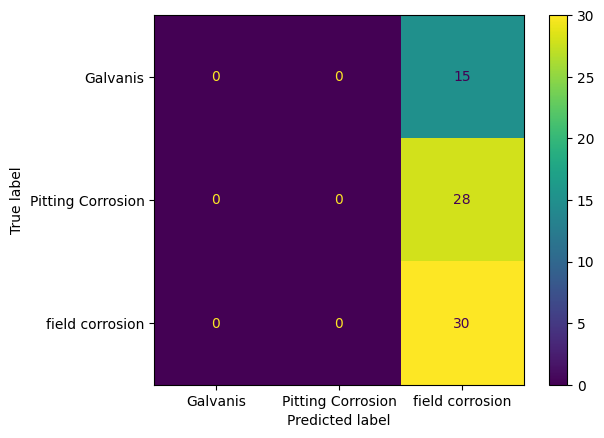

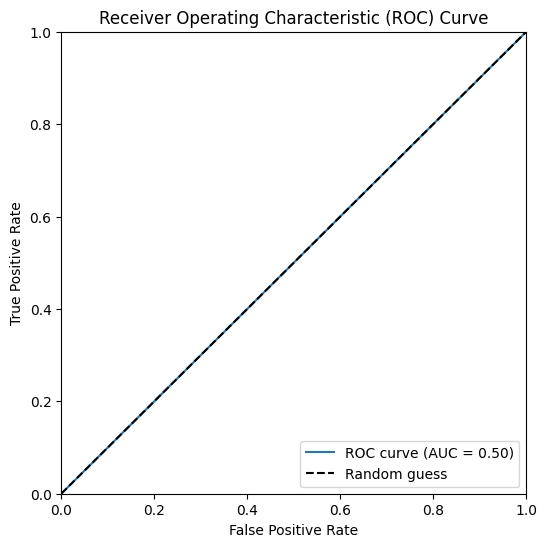

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 26s - loss: 1.0889 - acc: 0.4004 - val_loss: 1.0717 - val_acc: 0.4122 - 26s/epoch - 771ms/step
Epoch 2/50
34/34 - 25s - loss: 1.0674 - acc: 0.4192 - val_loss: 1.0649 - val_acc: 0.4122 - 25s/epoch - 739ms/step
Epoch 3/50
34/34 - 24s - loss: 1.0295 - acc: 0.4756 - val_loss: 1.0805 - val_acc: 0.3969 - 24s/epoch - 711ms/step
Epoch 4/50
34/34 - 25s - loss: 0.9319 - acc: 0.5977 - val_loss: 0.8838 - val_acc: 0.6412 - 25s/epoch - 727ms/step
Epoch 5/50
34/34 - 24s - loss: 0.8475 - acc: 0.6184 - val_loss: 0.8769 - val_acc: 0.6489 - 24s/epoch - 715ms/step
Epoch 6/50
34/34 - 24s - loss: 0.8663 - acc: 0.6071 - val_loss: 0.8482 - val_acc: 0.6565 - 24s/epoch - 719ms/step
Epoch 7/50
34/34 - 24s - loss: 0.7742 - acc: 0.6654 - val_loss: 0.8153 - val_acc: 0.6107 - 24s/epoch - 715ms/step
Epoch 8/50
34/34 - 24s - loss: 0.7841 - 

<Figure size 640x480 with 0 Axes>

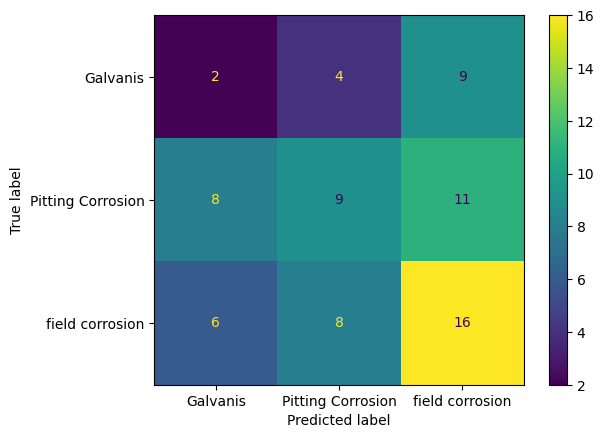

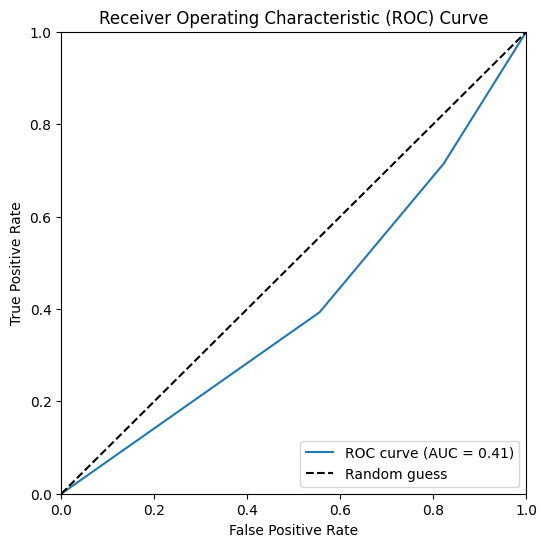

<Figure size 640x480 with 0 Axes>

In [28]:
from contextlib import redirect_stdout

OPTIMIZERS = [  [tf.keras.optimizers.Adam(learning_rate=0.1),"01"],
                [tf.keras.optimizers.Adam(learning_rate=0.01),"001"],
                [tf.keras.optimizers.Adam(learning_rate=0.001),"0001"],
                [tf.keras.optimizers.Adam(learning_rate=0.0001),"00001"]]


for optimizer in OPTIMIZERS:
    model_alexnet = create_model(size)
    
    with open('alexnet_pengujian_learningrate_model_summary.txt', 'w') as f:
        f.write("\n Optimizer: "+str(optimizer[1])+" \n")
        with redirect_stdout(f):
            model_alexnet.summary()
    f.close()

    Wsave = model_alexnet.get_weights()
    tf.keras.utils.plot_model(model_alexnet,to_file="./"+str(optimizer[1])+"_alexnet.png")    
    
    model_alexnet.set_weights(Wsave)
    model_alexnet.compile(  optimizer=optimizer[0], 
                            loss=tf.keras.losses.CategoricalCrossentropy(),
                            metrics=['acc']
                            )
    history = model_alexnet.fit(train_generator,validation_data=val_generator,epochs=50, verbose = 2)

    f = open("alexnet_pengujian_learningrate.csv", "a")
    f.write("\n"+str(optimizer[1])+","+
        str(history.history['loss'][-1])+","+
        str(history.history['val_loss'][-1])+","+
        str(history.history['acc'][-1])+","+
        str(history.history['val_acc'][-1])
    )
    f.close()
     
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/loss_'+str(optimizer[1])+'.png')
    plt.cla()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./alexnet/acc_'+str(optimizer[1])+'.png')
    
    plt.clf()

    PLOT_PARAM = optimizer[1] # CHANGE THIS PARAMETER DEPEND ON THE SIZE
    # Making Confusion Matrix
    # Get the predictions for the test data
    test_pred = np.argmax(model_alexnet.predict(test_generator), axis=1)
    test_label_num = test_generator.labels
    test_label_classes = test_generator.class_indices

    # convert the numerical label into string one by extracting the key
    test_label_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_label_num]
    test_pred_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_pred]

    # Create the confusion matrix
    conf_mat = ConfusionMatrixDisplay.from_predictions(
        test_label_str, test_pred_str
    )

    fig, ax = plt.subplots(figsize=(6,6))
    conf_mat.plot(ax=ax)
    ax.set_title('Confusion Matrix')
    # fig.subplots_adjust(right=1) # Adjust the layout to align the plot to the right 
    plt.savefig(f'./alexnet/confusion_matrix_{PLOT_PARAM}.png')
    plt.clf()

    # print the classification report
    clas_rep = classification_report(test_label_str, test_pred_str)

    # # Save the markdown table to a file
    with open(f'./alexnet/classification_report_{PLOT_PARAM}.txt', 'w') as f:
        f.write(clas_rep)
    # print(clas_rep)

    # ROC curve
    # calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(test_label_num, test_pred, pos_label=1)

    # calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.savefig(f'./alexnet/roc_curve_{PLOT_PARAM}.png')
    plt.show()
    plt.clf()

In [29]:
def create_mobilenet(size):

    mobilenet = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(size,size,3),
    weights=None,
    include_top=False,
    )
    
    model_mobilenet = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer( input_shape=(size,size,3)),
    mobilenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
    ])
    return model_mobilenet

mobilenet = create_mobilenet(128) #overfit, tapi hasil terbaik ya 128
mobilenet.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_17 (Flatten)        (None, 20480)             0         
                                                                 
 dropout_29 (Dropout)        (None, 20480)             0         
                                                                 
 dense_46 (Dense)            (None, 512)               10486272  
                                                                 
 dense_47 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 12,745,795
Trainable params: 12,711,683
Non-trainable params: 34,112
____________________________________

In [30]:
f = open("mobilenet_pengujian_learningrate.csv", "w")
f.write("learningrate,loss,val_loss,acc,val_acc")
f.close()

f = open("mobilenet_pengujian_learningrate_model_summary.txt", "w")
f.write("--------==== hasil model summary dari percobaan learningrate ====--------")
f.close()


In [31]:
size = 128    
TEST_DATA_DIR = '../testdata'
training_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2
        )

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = training_datagen.flow_from_directory(DATA_DIR,  
                                                        subset='training',
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size))   
val_generator = training_datagen.flow_from_directory(DATA_DIR, 
                                                        subset='validation', 
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size))
test_generator = test_datagen.flow_from_directory(TEST_DATA_DIR, 
                                                        batch_size=16,
                                                        class_mode='categorical',
                                                        target_size=(size,size)) 

Found 532 images belonging to 3 classes.
Found 131 images belonging to 3 classes.
Found 73 images belonging to 3 classes.


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 26s - loss: 910.1077 - acc: 0.4060 - val_loss: 2907.0542 - val_acc: 0.4122 - 26s/epoch - 779ms/step
Epoch 2/50
34/34 - 21s - loss: 1.2896 - acc: 0.3910 - val_loss: 4233.7632 - val_acc: 0.4122 - 21s/epoch - 605ms/step
Epoch 3/50
34/34 - 21s - loss: 1.0822 - acc: 0.4154 - val_loss: 2504.9226 - val_acc: 0.4122 - 21s/epoch - 614ms/step
Epoch 4/50
34/34 - 21s - loss: 1.0666 - acc: 0.4079 - val_loss: 1386.8146 - val_acc: 0.4122 - 21s/epoch - 618ms/step
Epoch 5/50
34/34 - 21s - loss: 1.0325 - acc: 0.4286 - val_loss: 735.7115 - val_acc: 0.4122 - 21s/epoch - 612ms/step
Epoch 6/50
34/34 - 21s - loss: 1.0093 - acc: 0.4944 - val_loss: 360.9286 - val_acc: 0.4122 - 21s/epoch - 615ms/step
Epoch 7/50
34/34 - 21s - loss: 1.0132 - acc: 0.4436 - val_loss: 177.9017 - val_acc: 0.4122 - 21s/epoch - 618ms/step
Epoch 8/50
34/34 - 2

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

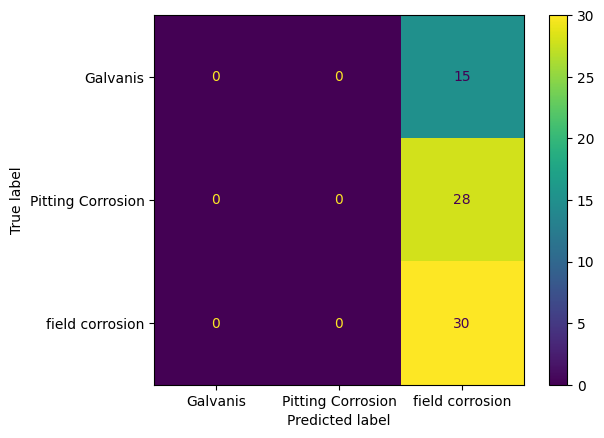

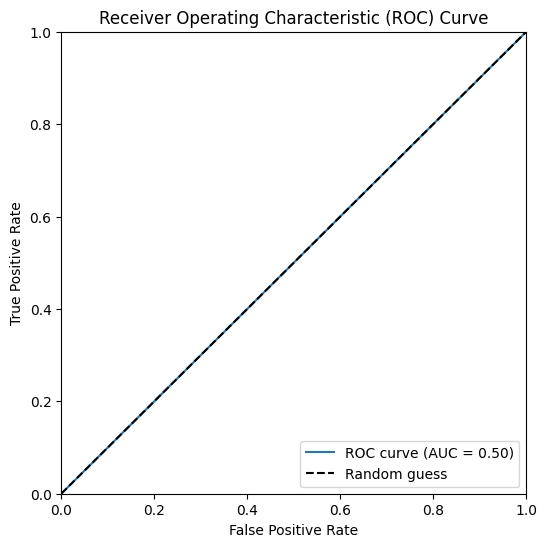

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 27s - loss: 41.8870 - acc: 0.4060 - val_loss: 228.5582 - val_acc: 0.2137 - 27s/epoch - 781ms/step
Epoch 2/50
34/34 - 20s - loss: 1.1009 - acc: 0.5508 - val_loss: 1.0908 - val_acc: 0.3740 - 20s/epoch - 603ms/step
Epoch 3/50
34/34 - 21s - loss: 0.9499 - acc: 0.5940 - val_loss: 1.0885 - val_acc: 0.4122 - 21s/epoch - 606ms/step
Epoch 4/50
34/34 - 21s - loss: 0.8886 - acc: 0.5977 - val_loss: 1.0880 - val_acc: 0.4122 - 21s/epoch - 616ms/step
Epoch 5/50
34/34 - 21s - loss: 0.8495 - acc: 0.6259 - val_loss: 1.1022 - val_acc: 0.3740 - 21s/epoch - 611ms/step
Epoch 6/50
34/34 - 21s - loss: 0.8355 - acc: 0.6541 - val_loss: 1.0843 - val_acc: 0.4122 - 21s/epoch - 626ms/step
Epoch 7/50
34/34 - 23s - loss: 0.8364 - acc: 0.6184 - val_loss: 1.1209 - val_acc: 0.4122 - 23s/epoch - 682ms/step
Epoch 8/50
34/34 - 21s - loss: 0.8557

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

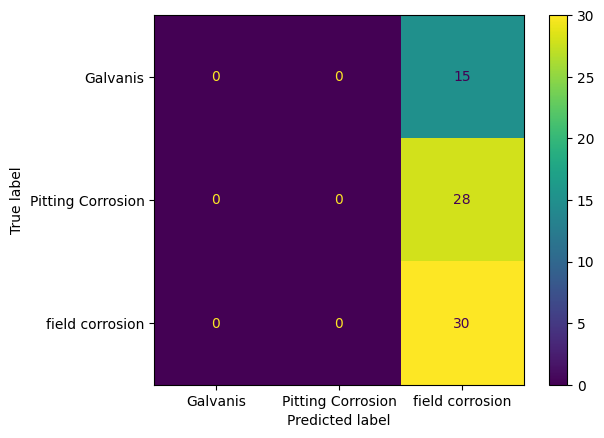

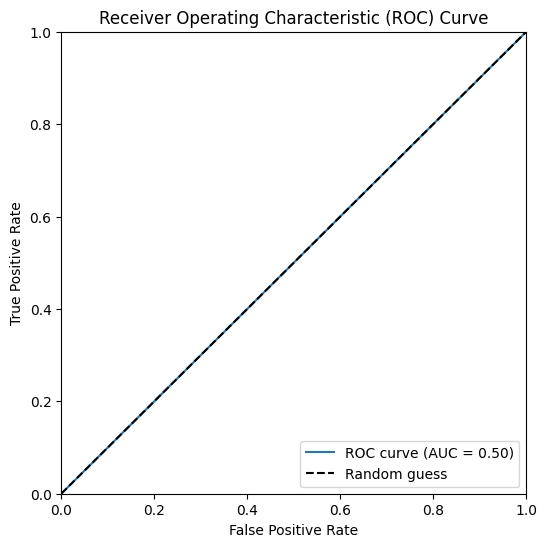

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 27s - loss: 6.8623 - acc: 0.3797 - val_loss: 1.0984 - val_acc: 0.4122 - 27s/epoch - 789ms/step
Epoch 2/50
34/34 - 22s - loss: 1.3605 - acc: 0.5188 - val_loss: 1.0976 - val_acc: 0.3740 - 22s/epoch - 635ms/step
Epoch 3/50
34/34 - 21s - loss: 0.9691 - acc: 0.5771 - val_loss: 1.1073 - val_acc: 0.2137 - 21s/epoch - 627ms/step
Epoch 4/50
34/34 - 21s - loss: 0.9525 - acc: 0.6053 - val_loss: 1.1028 - val_acc: 0.2137 - 21s/epoch - 621ms/step
Epoch 5/50
34/34 - 21s - loss: 0.7522 - acc: 0.6955 - val_loss: 1.0973 - val_acc: 0.3740 - 21s/epoch - 621ms/step
Epoch 6/50
34/34 - 21s - loss: 0.8902 - acc: 0.5996 - val_loss: 1.0974 - val_acc: 0.3740 - 21s/epoch - 621ms/step
Epoch 7/50
34/34 - 21s - loss: 0.7486 - acc: 0.6823 - val_loss: 1.0989 - val_acc: 0.3740 - 21s/epoch - 630ms/step
Epoch 8/50
34/34 - 22s - loss: 0.6978 - 

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

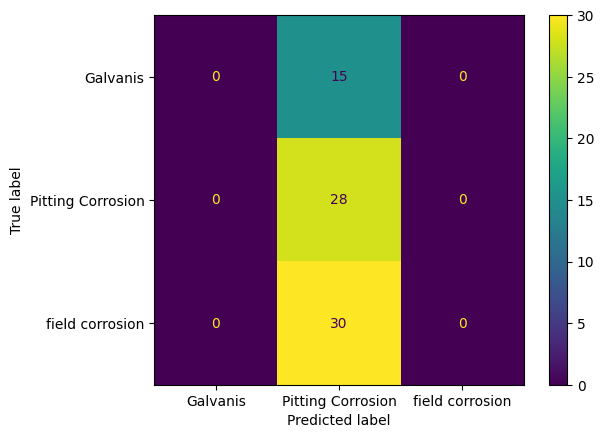

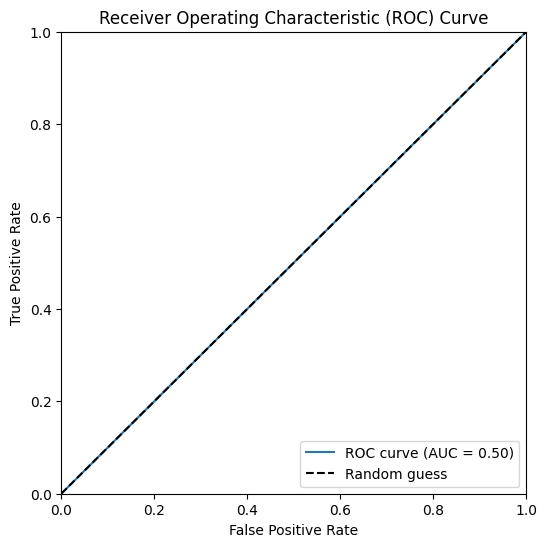

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
34/34 - 27s - loss: 1.5835 - acc: 0.4342 - val_loss: 1.0967 - val_acc: 0.4122 - 27s/epoch - 807ms/step
Epoch 2/50
34/34 - 22s - loss: 1.1259 - acc: 0.4680 - val_loss: 1.0961 - val_acc: 0.3740 - 22s/epoch - 634ms/step
Epoch 3/50
34/34 - 21s - loss: 0.9766 - acc: 0.5263 - val_loss: 1.0945 - val_acc: 0.3740 - 21s/epoch - 627ms/step
Epoch 4/50
34/34 - 21s - loss: 0.9601 - acc: 0.5075 - val_loss: 1.0947 - val_acc: 0.3740 - 21s/epoch - 623ms/step
Epoch 5/50
34/34 - 21s - loss: 0.9853 - acc: 0.4906 - val_loss: 1.0928 - val_acc: 0.4122 - 21s/epoch - 617ms/step
Epoch 6/50
34/34 - 21s - loss: 0.9087 - acc: 0.5677 - val_loss: 1.0904 - val_acc: 0.3740 - 21s/epoch - 630ms/step
Epoch 7/50
34/34 - 21s - loss: 0.8479 - acc: 0.5959 - val_loss: 1.0902 - val_acc: 0.3740 - 21s/epoch - 629ms/step
Epoch 8/50
34/34 - 22s - loss: 0.8329 - 

c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\igana\AppData\Local\R-MINI~1\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Figure size 640x480 with 0 Axes>

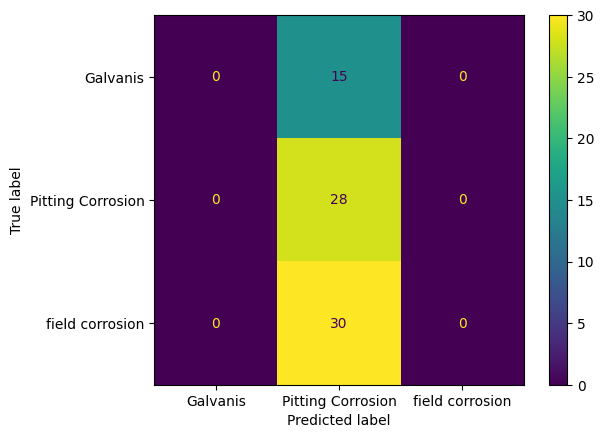

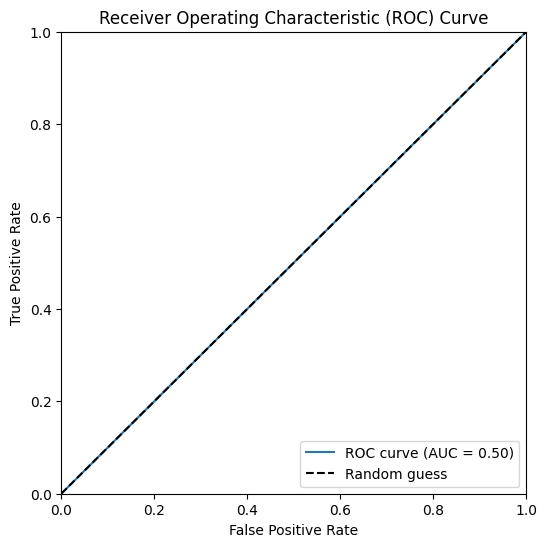

<Figure size 640x480 with 0 Axes>

In [32]:
OPTIMIZERS = [  [tf.keras.optimizers.Adam(learning_rate=0.1),"01"],
                [tf.keras.optimizers.Adam(learning_rate=0.01),"001"],
                [tf.keras.optimizers.Adam(learning_rate=0.001),"0001"],
                [tf.keras.optimizers.Adam(learning_rate=0.0001),"00001"]]

for optimizer in OPTIMIZERS:
    model_alexnet = create_mobilenet(size)
    
    with open('mobilenet_pengujian_learningrate_model_summary.txt', 'w') as f:
        f.write("\n Optimizer: "+str(optimizer[1])+" \n")
        with redirect_stdout(f):
            model_alexnet.summary()
    f.close()

    Wsave = model_alexnet.get_weights()
    tf.keras.utils.plot_model(model_alexnet,to_file="./"+str(optimizer[1])+"_mobilenet.png")    
    
    model_alexnet.set_weights(Wsave)
    model_alexnet.compile(  optimizer=optimizer[0], 
                            loss=tf.keras.losses.CategoricalCrossentropy(),
                            metrics=['acc']
                            )
    history = model_alexnet.fit(train_generator,validation_data=val_generator,epochs=50, verbose = 2)

    f = open("mobilenet_pengujian_learningrate.csv", "a")
    f.write("\n"+str(optimizer[1])+","+
        str(history.history['loss'][-1])+","+
        str(history.history['val_loss'][-1])+","+
        str(history.history['acc'][-1])+","+
        str(history.history['val_acc'][-1])
    )
    f.close()
     
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./mobilenet/loss_'+str(optimizer[1])+'.png')
    plt.cla()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./mobilenet/acc_'+str(optimizer[1])+'.png')
    
    plt.clf()

    PLOT_PARAM = optimizer[1] # CHANGE THIS PARAMETER DEPEND ON THE SIZE
    # Making Confusion Matrix
    # Get the predictions for the test data
    test_pred = np.argmax(model_alexnet.predict(test_generator), axis=1)
    test_label_num = test_generator.labels
    test_label_classes = test_generator.class_indices

    # convert the numerical label into string one by extracting the key
    test_label_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_label_num]
    test_pred_str = [list(test_label_classes.keys())[list(test_label_classes.values()).index(val)] for val in test_pred]

    # Create the confusion matrix
    conf_mat = ConfusionMatrixDisplay.from_predictions(
        test_label_str, test_pred_str
    )

    fig, ax = plt.subplots(figsize=(6,6))
    conf_mat.plot(ax=ax)
    ax.set_title('Confusion Matrix')
    # fig.subplots_adjust(right=1) # Adjust the layout to align the plot to the right 
    plt.savefig(f'./mobilenet/confusion_matrix_{PLOT_PARAM}.png')
    plt.clf()

    # print the classification report
    clas_rep = classification_report(test_label_str, test_pred_str)

    # # Save the markdown table to a file
    with open(f'./mobilenet/classification_report_{PLOT_PARAM}.txt', 'w') as f:
        f.write(clas_rep)
    # print(clas_rep)

    # ROC curve
    # calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(test_label_num, test_pred, pos_label=1)

    # calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.savefig(f'./mobilenet/roc_curve_{PLOT_PARAM}.png')
    plt.show()
    plt.clf()